<a href="https://colab.research.google.com/github/PhingSupanat/Senior_Project/blob/main/Transfer_Model-Senior_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''import os
import numpy as np
import re
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd'''

'import os\nimport numpy as np\nimport re\nimport glob\nimport cv2\nimport matplotlib.pyplot as plt\nfrom google.colab.patches import cv2_imshow\nimport pandas as pd'

In [ ]:
'''path = '/content/drive/MyDrive/'
a =  os.listdir(path)

i = 0
for file in a:
  n = re.findall("Train", a[i])
  print(file)
  if len(n) != 0:
    print(i)'''

'path = \'/content/drive/MyDrive/\'\na =  os.listdir(path)\n\ni = 0\nfor file in a:\n  n = re.findall("Train", a[i])\n  print(file)\n  if len(n) != 0:\n    print(i)'

In [ ]:
#os.remove(path + file)

In [ ]:
import h5py
with h5py.File("/content/drive/MyDrive/Project/Training_Data.h5", "r") as f:
    images = list(f.keys())[0]
    labels = list(f.keys())[1]
    X = f[images][()]
    Y = f[labels][()]

In [ ]:
from sklearn.preprocessing import LabelEncoder

print(type(X))
X = X/255.0
print(type(X))
X = X.astype(np.float16)
print(type(X))
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y,2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
with h5py.File("/content/drive/MyDrive/Project/Prep_Training_Data.h5", "w") as data_file:
    data_file.create_dataset("images", data=X)
    data_file.create_dataset("labels", data=Y)


In [ ]:
plt.imshow(X[0])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb2f582a280> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

# Import libaries

In [ ]:
from google.colab import drive

# To mount at google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#drive.flush_and_unmount()

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4250831851839488109
 xla_global_id: -1]

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from collections import Counter

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,auc,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#dl libraraies
from keras import backend as K
from tensorflow.keras import layers, Model
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# specifically for cnn
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPool2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

from sklearn.metrics import classification_report
import itertools
from tensorflow import keras

In [ ]:
'''X=[]
Z=[]
def assign_label(img, type):
    return type

def make_train_data(type, DIR):

    for img in tqdm(os.listdir(DIR)):

        label = assign_label(img, type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)

        X.append(np.array(img))
        Z.append(label)'''

'X=[]\nZ=[]\ndef assign_label(img, type):\n    return type\n\ndef make_train_data(type, DIR):\n\n    for img in tqdm(os.listdir(DIR)):\n\n        label = assign_label(img, type)\n        path = os.path.join(DIR, img)\n        img = cv2.imread(path, cv2.IMREAD_COLOR)\n        \n        X.append(np.array(img))\n        Z.append(label)'

In [ ]:
'''IMG_SIZE = 224
Onychomycosis_DIR = '/content/drive/MyDrive/Project/Open_Data/Onychomycosis'
Naildystrophy_DIR = '/content/drive/MyDrive/Project/Open_Data/Naildystrophy'
A1_Onychomycosis_DIR = '/content/drive/MyDrive/Project/C_A1_Onychomycosis/'
A2_Onychomycosis_DIR = '/content/drive/MyDrive/Project/C_A2_Onychomycosis/'
A1_Naildystrophy_DIR = '/content/drive/MyDrive/Project/C_A1_Naildystrophy/'
A2_Naildystrophy_DIR = '/content/drive/MyDrive/Project/C_A2_Naildystrophy/'

Onychomycosis = [Onychomycosis_DIR, A1_Onychomycosis_DIR, A2_Onychomycosis_DIR]
Naildystrophy = [Naildystrophy_DIR, A1_Naildystrophy_DIR, A2_Naildystrophy_DIR]
'''

'''def assign_label(img, type):
    return type

def make_train_data1(type, DIR):

    for img in tqdm(os.listdir(DIR)):

        #if len(X) == 9720:
          #break

        label = assign_label(img, type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        A.append(np.array(img))

def make_train_data2(type, DIR):

    for img in tqdm(os.listdir(DIR)):

        #if len(X) == 9720:
          #break

        label = assign_label(img, type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        B.append(np.array(img))

A = []
B = []

for dir in Onychomycosis:
  make_train_data1('Onychomycosis', dir)

for dir in Naildystrophy:
  make_train_data2('Nail Dystrophy', dir)

i=0
for image in enumerate(A):
  image = A[i]
  cv2.imwrite(f'/content/drive/MyDrive/Project/Trained Data/Onychomycosis/Onychomycosis_{i}.png', image)
  i += 1
i=0
for image in enumerate(B):
  image = B[i]
  cv2.imwrite(f'/content/drive/MyDrive/Project/Trained Data/Naildystrophy/Naildystrophy_{i}.png', image)
  i += 1
  '''

"def assign_label(img, type):\n    return type\n\ndef make_train_data1(type, DIR):\n\n    for img in tqdm(os.listdir(DIR)):\n\n        #if len(X) == 9720:\n          #break\n        \n        label = assign_label(img, type)\n        path = os.path.join(DIR, img)\n        img = cv2.imread(path, cv2.IMREAD_COLOR)\n        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))\n        \n        A.append(np.array(img))\n\ndef make_train_data2(type, DIR):\n\n    for img in tqdm(os.listdir(DIR)):\n\n        #if len(X) == 9720:\n          #break\n        \n        label = assign_label(img, type)\n        path = os.path.join(DIR, img)\n        img = cv2.imread(path, cv2.IMREAD_COLOR)\n        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))\n        \n        B.append(np.array(img))\n\nA = []\nB = []\n\nfor dir in Onychomycosis:\n  make_train_data1('Onychomycosis', dir)\n\nfor dir in Naildystrophy:\n  make_train_data2('Nail Dystrophy', dir)\n\ni=0\nfor image in enumerate(A):\n  image = A[i]\n  cv2.imwrite(f'

In [ ]:
'''import h5py
with h5py.File("/content/drive/MyDrive/Project/Training_Data.h5", "r") as f:
    image = list(f.keys())[0]
    label = list(f.keys())[1]
    X = f[image][()]
    Y = f[label][()]
X = X/255.0
with h5py.File("/content/drive/MyDrive/Project/Scaled_Training_Data.h5", "w") as data_file:
    data_file.create_dataset("images", data=X)'''

# Data Preprocessing

In [ ]:
(img_height, img_width) = (224, 224)
batch_size = 96
epochs = 50

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255.0,
                                      rotation_range=0.05,  #Randomly rotate images in the range
                                      zoom_range = 0.2, # Randomly zoom image
                                      width_shift_range=0.1,  #Randomly shift images horizontally
                                      height_shift_range=0.1,  #Randomly shift images vertically
                                      shear_range=0.05, #Randomly shear images
                                      validation_split=0.25)

train_generator = image_generator.flow_from_directory(
                                                 batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/Project/Open_Data',
                                                 target_size=(img_height, img_width),
                                                 shuffle=True,
                                                 subset="training",
                                                 class_mode='categorical')

validation_generator = image_generator.flow_from_directory(
                                                 batch_size=batch_size,
                                                 directory='/content/drive/MyDrive/Project/Open_Data',
                                                 target_size=(img_height, img_width),
                                                 shuffle=False,
                                                 subset="validation",
                                                 class_mode='categorical',
                                                 seed = 42)

Found 2576 images belonging to 2 classes.
Found 858 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
'''train_generator.reset()
X, y = next(train_generator)
for i in tqdm(range(train_generator.samples)): #1st batch is already fetched before the for loop.
  img, label = next(train_generator)
  X = np.append(X, img, axis=0 )
  y = np.append(y, label, axis=0)
print(X.shape, y.shape)'''

In [ ]:
#train_generator.class_indices

In [ ]:
'''reshaped_X = x_train.reshape(x_train.shape[0],-1)

#oversampling
oversample = SMOTE(random_state=42)
oversampled_X, oversampled_y  = oversample.fit_resample(reshaped_X , y_train)

# reshaping X back to the first dims
x_train = oversampled_X.reshape(-1, img_height, img_width, 3)
y_train = oversampled_y
'''
'''count = 0

for i in range(len(y_train)):
    if y_train[i][0] == 0:
        count += 1

print(count)'''

In [ ]:
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)
early_stop = EarlyStopping(patience=10,restore_best_weights=True)
check_point = ModelCheckpoint('middle_weight.h5')

In [ ]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(None)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Transfer Model

In [ ]:
#pip install tensorflow --upgrade

In [ ]:
#pip install --upgrade tensorflow==2.9.1

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet201
from tensorflow.keras.applications.mobilenet import MobileNet
#from tensorflow.keras.applications.convnext import ConvNeXtXLarge
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M, EfficientNetV2B2
from tensorflow.keras.applications.efficientnet import EfficientNetB7, EfficientNetB3, EfficientNetB4
from collections import Counter
from sklearn.model_selection import StratifiedKFold

In [ ]:
#cv = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)

In [ ]:
'''counter = Counter(train_generator.classes)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights
'''

In [ ]:
target_names = ['Nail Dystrophy', 'Onychomycosis']

In [ ]:
from sklearn.utils import class_weight
train_class_weights = class_weight.compute_class_weight(
                                                  class_weight='balanced',
                                                  classes=np.unique(train_generator.classes),
                                                  y=train_generator.classes)

class_weight = dict(enumerate(train_class_weights))
class_weight

## Xception

Epoch 1/50
208/208 [==============================] - 389s 2s/step - loss: 0.6772 - accuracy: 0.4655 - val_loss: 2.8406 - val_accuracy: 0.6685 - lr: 0.0010
Epoch 2/50
208/208 [==============================] - 330s 2s/step - loss: 0.4334 - accuracy: 0.8038 - val_loss: 1.2911 - val_accuracy: 0.6322 - lr: 0.0010
Epoch 3/50
208/208 [==============================] - 330s 2s/step - loss: 0.2937 - accuracy: 0.8699 - val_loss: 0.5156 - val_accuracy: 0.7856 - lr: 0.0010
Epoch 4/50
208/208 [==============================] - 334s 2s/step - loss: 0.2367 - accuracy: 0.8987 - val_loss: 0.9301 - val_accuracy: 0.7415 - lr: 0.0010
Epoch 5/50
208/208 [==============================] - 328s 2s/step - loss: 0.1932 - accuracy: 0.9206 - val_loss: 0.8096 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 6/50
208/208 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9347
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
208/208 [==============================] - 329s

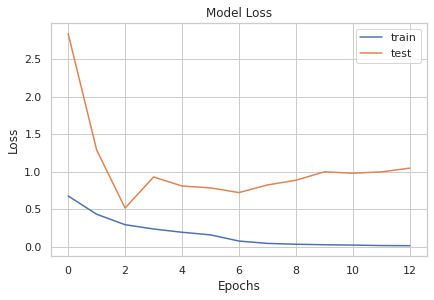

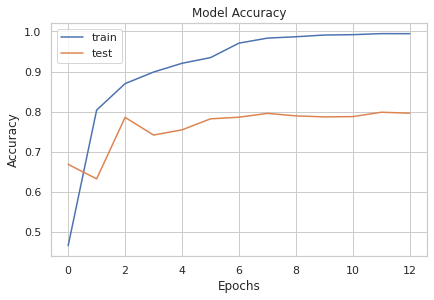

ValueError: ignored

In [ ]:
model = Xception(include_top=False, weights='imagenet', input_shape=(img_height, img_width,3))

x = GlobalAveragePooling2D()(model.output)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

History = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              verbose = 1,
                              epochs = epochs,
                              class_weight = class_weight,
                              callbacks = [early_stop,check_point,red_lr])

loss, accuracy = model.evaluate_generator(validation_generator, steps = validation_generator.samples // batch_size)
print('model name: Xception')
print('Loss: ',loss)
print('Accuracy: ',accuracy)

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

                precision    recall  f1-score   support

Nail Dystrophy       0.64      0.62      0.63      4232
 Onychomycosis       0.37      0.38      0.38      2430

      accuracy                           0.54      6662
     macro avg       0.50      0.50      0.50      6662
  weighted avg       0.54      0.54      0.54      6662



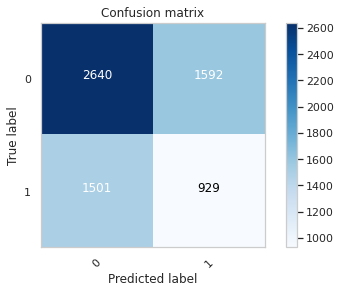

In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict_generator(validation_generator)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = validation_generator.labels
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, y_pred_classes, target_names = target_names))

##InceptionResNetV2

Epoch 1/50
208/208 [==============================] - 342s 2s/step - loss: 0.4479 - accuracy: 0.7942 - val_loss: 641.6368 - val_accuracy: 0.6905 - lr: 0.0010
Epoch 2/50
208/208 [==============================] - 219s 1s/step - loss: 0.3522 - accuracy: 0.8495 - val_loss: 5.0321 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 3/50
208/208 [==============================] - 220s 1s/step - loss: 0.3335 - accuracy: 0.8578 - val_loss: 1125132.8750 - val_accuracy: 0.6643 - lr: 0.0010
Epoch 4/50
208/208 [==============================] - 219s 1s/step - loss: 0.3131 - accuracy: 0.8685 - val_loss: 0.5991 - val_accuracy: 0.7453 - lr: 0.0010
Epoch 5/50
208/208 [==============================] - 219s 1s/step - loss: 0.2439 - accuracy: 0.8976 - val_loss: 0.6829 - val_accuracy: 0.7414 - lr: 0.0010
Epoch 6/50
208/208 [==============================] - 218s 1s/step - loss: 0.2134 - accuracy: 0.9127 - val_loss: 1.0466 - val_accuracy: 0.7671 - lr: 0.0010
Epoch 7/50
208/208 [==============================] - 21

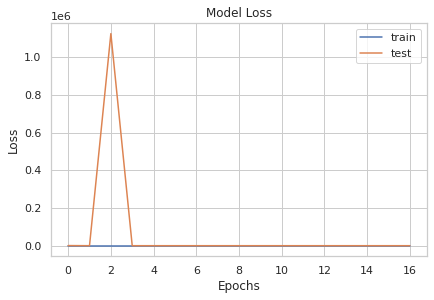

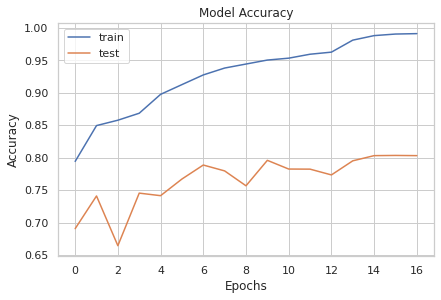

In [ ]:
model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_height, img_width,3))

x = GlobalAveragePooling2D()(model.output)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

History = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              verbose = 1,
                              epochs = epochs,
                              class_weight = class_weight,
                              callbacks = [early_stop,check_point,red_lr])

loss, accuracy = model.evaluate_generator(validation_generator, steps = validation_generator.samples // batch_size)
print('model name: InceptionResNetV2')
print('Loss: ',loss)
print('Accuracy: ',accuracy)

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

                precision    recall  f1-score   support

Nail Dystrophy       0.80      0.88      0.84      4232
 Onychomycosis       0.75      0.62      0.68      2430

      accuracy                           0.79      6662
     macro avg       0.78      0.75      0.76      6662
  weighted avg       0.78      0.79      0.78      6662



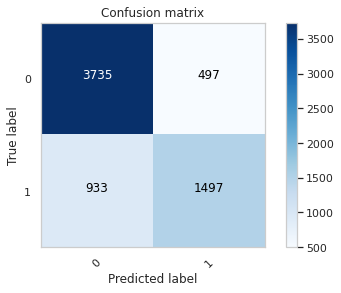

In [ ]:
#validation_generator.reset()

# Predict the values from the validation dataset
y_pred = model.predict_generator(validation_generator)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = validation_generator.labels
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, y_pred_classes, target_names = target_names))

fpr, tpr, auc_thresholds = roc_curve(y_true, y_pred_classes)
plot_roc_curve(fpr, tpr)

In [ ]:
model.save('/content/drive/MyDrive/Project/Model_Save/InceptionResNetV2.h5')

In [ ]:
y_pred_1 = y_pred[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_1)
fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plt.plot(recall, precision, marker='.', label='InceptionResNetV2')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

optimal_proba_cutoff = thresholds[ix]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred[:, -1]]

print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred_classes), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred_classes), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred_classes), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred_classes), f1_score(y_true, roc_predictions)))
print("AUC Before and After Thresholding: {}, {}".format(roc_auc_score(y_true, y_pred_classes), roc_auc_score(y_true, roc_predictions),))

fpr, tpr, auc_thresholds = roc_curve(y_true, roc_predictions)

plot_roc_curve(fpr, tpr)

confusion_mtx = confusion_matrix(y_true, roc_predictions)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, roc_predictions, target_names = target_names))

##EfficientNetV2M

Epoch 1/50
208/208 [==============================] - 402s 2s/step - loss: 0.5974 - accuracy: 0.7081 - val_loss: 0.9010 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 2/50
208/208 [==============================] - 363s 2s/step - loss: 0.4892 - accuracy: 0.7687 - val_loss: 14233.4639 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 3/50
208/208 [==============================] - 361s 2s/step - loss: 0.5102 - accuracy: 0.7494 - val_loss: 0.6550 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 4/50
208/208 [==============================] - 359s 2s/step - loss: 0.4478 - accuracy: 0.7857 - val_loss: 0.7869 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 5/50
208/208 [==============================] - 360s 2s/step - loss: 0.3921 - accuracy: 0.8195 - val_loss: 0.6222 - val_accuracy: 0.7405 - lr: 0.0010
Epoch 6/50
208/208 [==============================] - 360s 2s/step - loss: 0.3490 - accuracy: 0.8416 - val_loss: 0.5590 - val_accuracy: 0.7121 - lr: 0.0010
Epoch 7/50
208/208 [==============================] - 357s 2

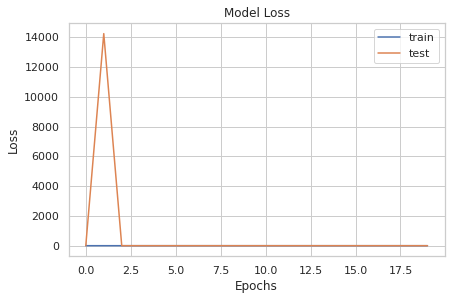

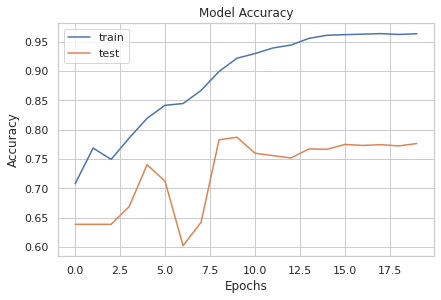

In [ ]:
model = EfficientNetV2M(include_top=False, weights='imagenet', input_shape=(img_height, img_width,3))

x = GlobalAveragePooling2D()(model.output)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

History = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              verbose = 1,
                              epochs = epochs,
                              class_weight = class_weight,
                              callbacks = [early_stop,check_point,red_lr])

loss, accuracy = model.evaluate_generator(validation_generator, steps = validation_generator.samples // batch_size)
print('model name: EfficientNetV2M')
print('Loss: ',loss)
print('Accuracy: ',accuracy)

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Project/Model_Save/EfficientNetV2M.h5')

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

                precision    recall  f1-score   support

Nail Dystrophy       0.82      0.84      0.83      4232
 Onychomycosis       0.71      0.69      0.70      2430

      accuracy                           0.78      6662
     macro avg       0.77      0.76      0.77      6662
  weighted avg       0.78      0.78      0.78      6662



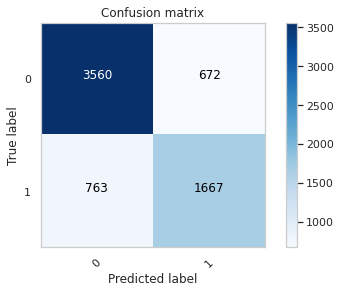

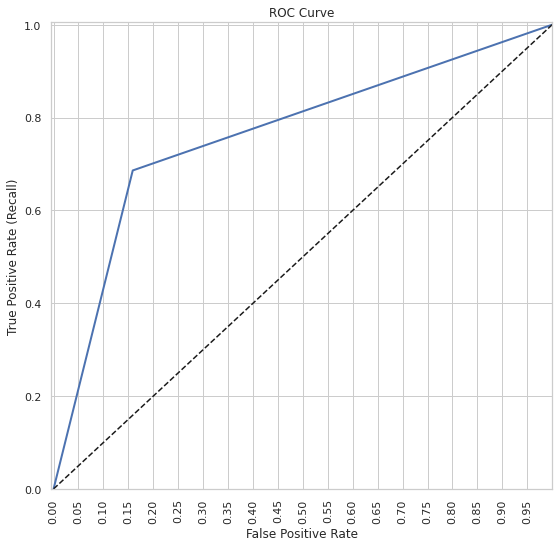

In [ ]:
#validation_generator.reset()

# Predict the values from the validation dataset
y_pred = model.predict_generator(validation_generator)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = validation_generator.labels
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, y_pred_classes, target_names = target_names))

fpr, tpr, auc_thresholds = roc_curve(y_true, y_pred_classes)
plot_roc_curve(fpr, tpr)

Best Threshold=0.176364, F-Score=0.716


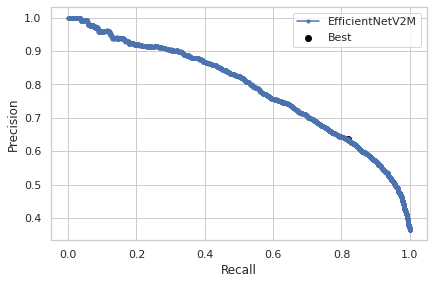

Accuracy Score Before and After Thresholding: 0.7845992194536175, 0.7629840888622036
Precision Score Before and After Thresholding: 0.7126977340743907, 0.6358123204596233
Recall Score Before and After Thresholding: 0.6860082304526749, 0.8197530864197531
F1 Score Before and After Thresholding: 0.6990983434682323, 0.7161603451375157
AUC Before and After Thresholding: 0.7636090301601749, 0.7750703050246215
                precision    recall  f1-score   support

Nail Dystrophy       0.88      0.73      0.80      4232
 Onychomycosis       0.64      0.82      0.72      2430

      accuracy                           0.76      6662
     macro avg       0.76      0.78      0.76      6662
  weighted avg       0.79      0.76      0.77      6662



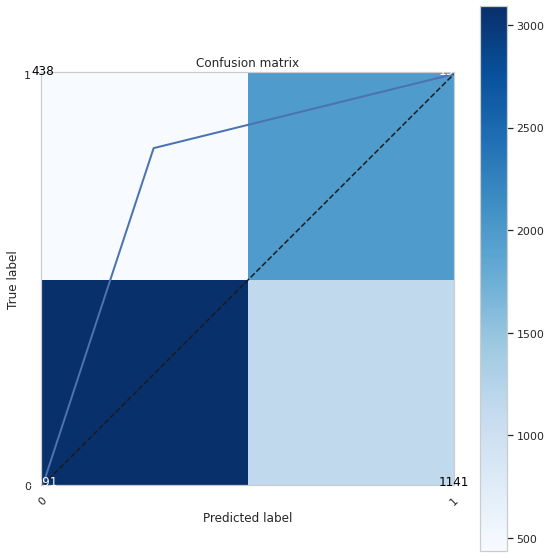

In [ ]:
y_pred_1 = y_pred[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_1)
fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plt.plot(recall, precision, marker='.', label='EfficientNetV2M')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

optimal_proba_cutoff = thresholds[ix]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred[:, -1]]

print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred_classes), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred_classes), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred_classes), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred_classes), f1_score(y_true, roc_predictions)))
print("AUC Before and After Thresholding: {}, {}".format(roc_auc_score(y_true, y_pred_classes), roc_auc_score(y_true, roc_predictions),))

fpr, tpr, auc_thresholds = roc_curve(y_true, roc_predictions)
plot_roc_curve(fpr, tpr)

                precision    recall  f1-score   support

Nail Dystrophy       0.88      0.73      0.80      4232
 Onychomycosis       0.64      0.82      0.72      2430

      accuracy                           0.76      6662
     macro avg       0.76      0.78      0.76      6662
  weighted avg       0.79      0.76      0.77      6662



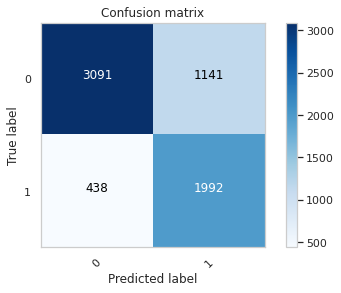

In [ ]:
confusion_mtx = confusion_matrix(y_true, roc_predictions)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, roc_predictions, target_names = target_names))

##EfficientNetV2B2

35839040/35839040 [==============================] - 0s 0us/step
Epoch 1/50
208/208 [==============================] - 376s 2s/step - loss: 0.5253 - accuracy: 0.7435 - val_loss: 0.6164 - val_accuracy: 0.6602 - lr: 0.0010
Epoch 2/50
208/208 [==============================] - 360s 2s/step - loss: 0.4316 - accuracy: 0.8012 - val_loss: 0.7093 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 3/50
208/208 [==============================] - 359s 2s/step - loss: 0.3927 - accuracy: 0.8182 - val_loss: 0.6862 - val_accuracy: 0.6575 - lr: 0.0010
Epoch 4/50
208/208 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.8492
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
208/208 [==============================] - 356s 2s/step - loss: 0.3420 - accuracy: 0.8492 - val_loss: 2.8480 - val_accuracy: 0.6386 - lr: 0.0010
Epoch 5/50
208/208 [==============================] - 358s 2s/step - loss: 0.2794 - accuracy: 0.8770 - val_loss: 0.5231 - val_accuracy: 0.7467 - lr: 

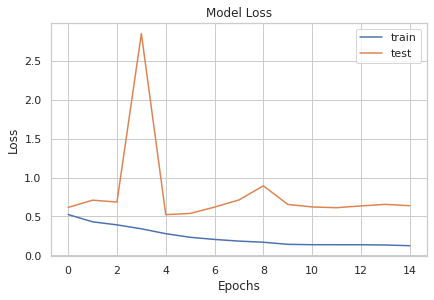

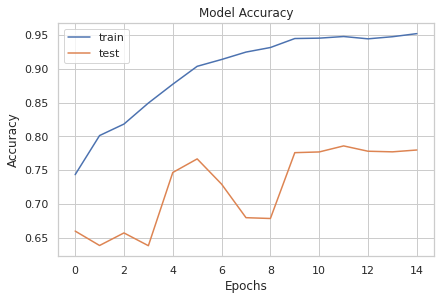

In [ ]:
model = EfficientNetV2B2(include_top=False, weights='imagenet', input_shape=(img_height, img_width,3))

x = GlobalAveragePooling2D()(model.output)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

History = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              verbose = 1,
                              epochs = epochs,
                              class_weight = class_weight,
                              callbacks = [early_stop,check_point,red_lr])

loss, accuracy = model.evaluate_generator(validation_generator, steps = validation_generator.samples // batch_size)
print('model name: EfficientNetV2B2')
print('Loss: ',loss)
print('Accuracy: ',accuracy)

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Project/Model_Save/EfficientNetV2B2.h5')

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

                precision    recall  f1-score   support

Nail Dystrophy       0.82      0.79      0.80      4232
 Onychomycosis       0.65      0.69      0.67      2430

      accuracy                           0.75      6662
     macro avg       0.73      0.74      0.74      6662
  weighted avg       0.76      0.75      0.75      6662



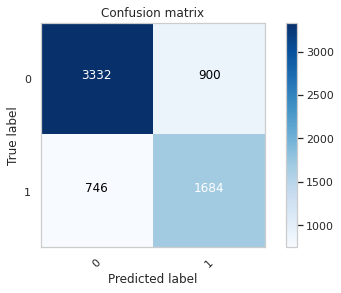

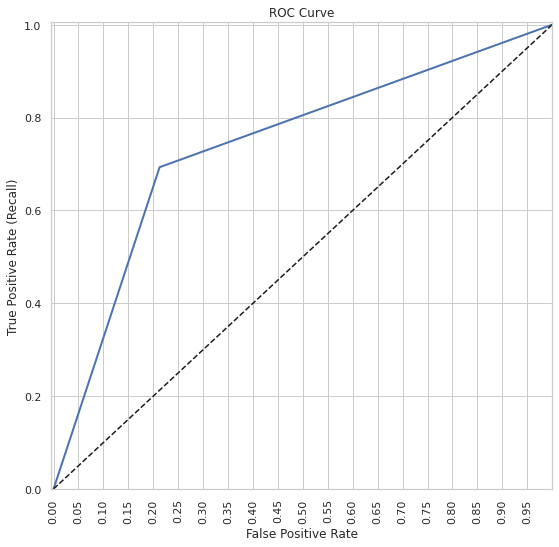

In [ ]:
#validation_generator.reset()

# Predict the values from the validation dataset
y_pred = model.predict_generator(validation_generator)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = validation_generator.labels
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, y_pred_classes, target_names = target_names))

fpr, tpr, auc_thresholds = roc_curve(y_true, y_pred_classes)
plot_roc_curve(fpr, tpr)

Best Threshold=0.237516, F-Score=0.685


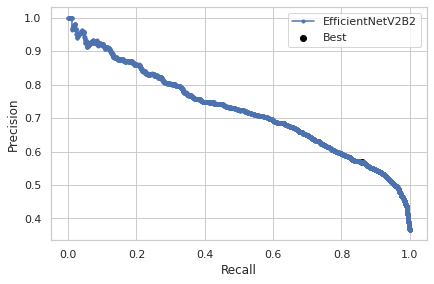

Accuracy Score Before and After Thresholding: 0.752927048934254, 0.7119483638546983
Precision Score Before and After Thresholding: 0.651702786377709, 0.5696754840469048
Recall Score Before and After Thresholding: 0.6930041152263374, 0.8596707818930042
F1 Score Before and After Thresholding: 0.6717191862784203, 0.6852550434639987
AUC Before and After Thresholding: 0.7401693543995581, 0.7433987179786381


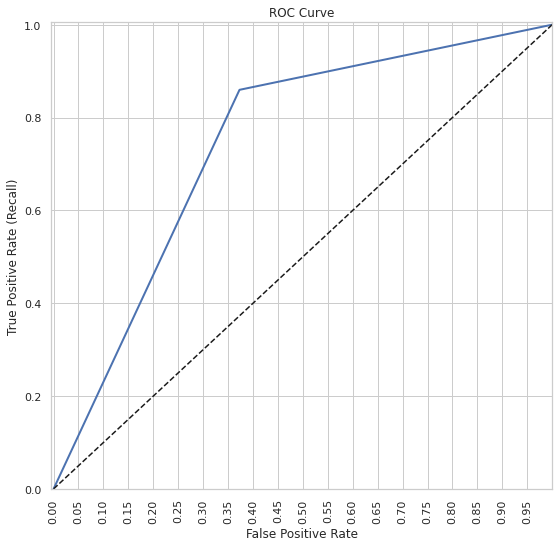

In [ ]:
y_pred_1 = y_pred[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_1)
fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plt.plot(recall, precision, marker='.', label='EfficientNetV2B2')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

optimal_proba_cutoff = thresholds[ix]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred[:, -1]]

print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred_classes), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred_classes), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred_classes), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred_classes), f1_score(y_true, roc_predictions)))
print("AUC Before and After Thresholding: {}, {}".format(roc_auc_score(y_true, y_pred_classes), roc_auc_score(y_true, roc_predictions),))

fpr, tpr, auc_thresholds = roc_curve(y_true, roc_predictions)
plot_roc_curve(fpr, tpr)

                precision    recall  f1-score   support

Nail Dystrophy       0.89      0.63      0.73      4232
 Onychomycosis       0.57      0.86      0.69      2430

      accuracy                           0.71      6662
     macro avg       0.73      0.74      0.71      6662
  weighted avg       0.77      0.71      0.72      6662



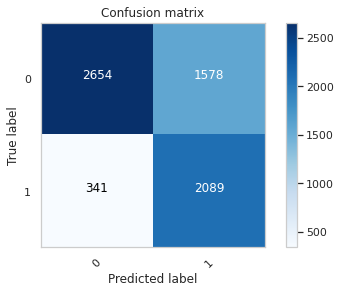

In [ ]:
confusion_mtx = confusion_matrix(y_true, roc_predictions)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, roc_predictions, target_names = target_names))

##EfficientNetB3

43941136/43941136 [==============================] - 0s 0us/step
Epoch 1/50
208/208 [==============================] - 382s 2s/step - loss: 0.4412 - accuracy: 0.7975 - val_loss: 1.8776 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 2/50
208/208 [==============================] - 360s 2s/step - loss: 0.3012 - accuracy: 0.8695 - val_loss: 1.2920 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 3/50
208/208 [==============================] - 358s 2s/step - loss: 0.2391 - accuracy: 0.9014 - val_loss: 0.7832 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 4/50
208/208 [==============================] - ETA: 0s - loss: 0.1993 - accuracy: 0.9174
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
208/208 [==============================] - 358s 2s/step - loss: 0.1993 - accuracy: 0.9174 - val_loss: 1.7544 - val_accuracy: 0.6386 - lr: 0.0010
Epoch 5/50
208/208 [==============================] - 357s 2s/step - loss: 0.1156 - accuracy: 0.9575 - val_loss: 1.5148 - val_accuracy: 0.6618 - lr: 

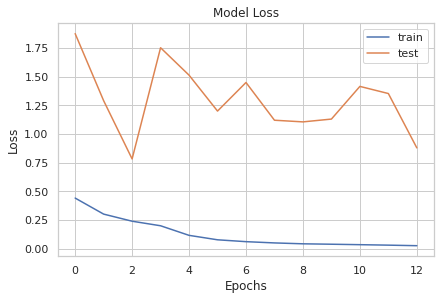

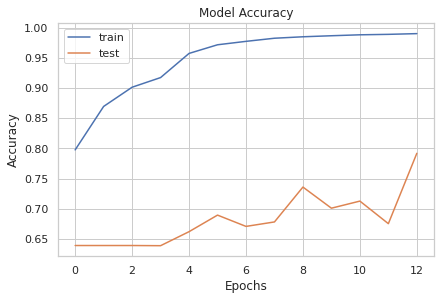

In [ ]:
model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(img_height, img_width,3))

x = GlobalAveragePooling2D()(model.output)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

History = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              verbose = 1,
                              epochs = epochs,
                              class_weight = class_weight,
                              callbacks = [early_stop,check_point,red_lr])

loss, accuracy = model.evaluate_generator(validation_generator, steps = validation_generator.samples // batch_size)
print('model name: EfficientNetB3')
print('Loss: ',loss)
print('Accuracy: ',accuracy)

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Project/Model_Save/EfficientNetB3.h5')

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

                precision    recall  f1-score   support

Nail Dystrophy       0.64      1.00      0.78      4232
 Onychomycosis       0.00      0.00      0.00      2430

      accuracy                           0.64      6662
     macro avg       0.32      0.50      0.39      6662
  weighted avg       0.40      0.64      0.49      6662



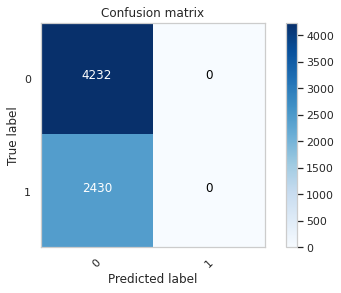

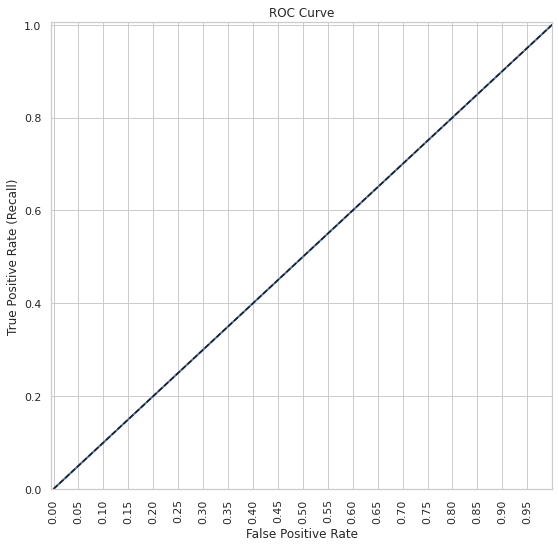

In [ ]:
#validation_generator.reset()

# Predict the values from the validation dataset
y_pred = model.predict_generator(validation_generator)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = validation_generator.labels
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, y_pred_classes, target_names = target_names))

fpr, tpr, auc_thresholds = roc_curve(y_true, y_pred_classes)
plot_roc_curve(fpr, tpr)

Best Threshold=0.268518, F-Score=nan


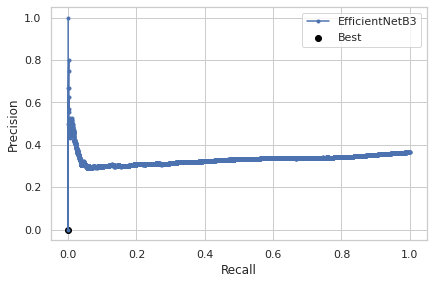

Accuracy Score Before and After Thresholding: 0.6352446712698889, 0.6350945661963374
Precision Score Before and After Thresholding: 0.0, 0.0
Recall Score Before and After Thresholding: 0.0, 0.0
F1 Score Before and After Thresholding: 0.0, 0.0
AUC Before and After Thresholding: 0.5, 0.49988185255198486


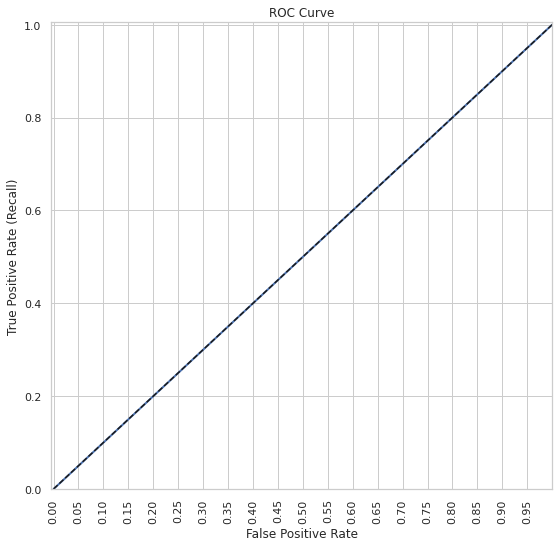

In [ ]:
y_pred_1 = y_pred[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_1)
fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plt.plot(recall, precision, marker='.', label='EfficientNetB3')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

optimal_proba_cutoff = thresholds[ix]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred[:, -1]]

print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred_classes), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred_classes), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred_classes), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred_classes), f1_score(y_true, roc_predictions)))
print("AUC Before and After Thresholding: {}, {}".format(roc_auc_score(y_true, y_pred_classes), roc_auc_score(y_true, roc_predictions),))

fpr, tpr, auc_thresholds = roc_curve(y_true, roc_predictions)
plot_roc_curve(fpr, tpr)

                precision    recall  f1-score   support

Nail Dystrophy       0.64      1.00      0.78      4232
 Onychomycosis       0.00      0.00      0.00      2430

      accuracy                           0.64      6662
     macro avg       0.32      0.50      0.39      6662
  weighted avg       0.40      0.64      0.49      6662



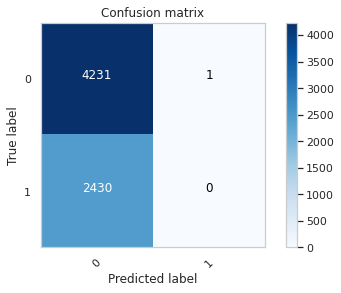

In [ ]:
confusion_mtx = confusion_matrix(y_true, roc_predictions)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, roc_predictions, target_names = target_names))

##EfficientNetB4

71686520/71686520 [==============================] - 0s 0us/step
Epoch 1/50
208/208 [==============================] - 388s 2s/step - loss: 0.4406 - accuracy: 0.7958 - val_loss: 0.9518 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 2/50
208/208 [==============================] - 361s 2s/step - loss: 0.3082 - accuracy: 0.8682 - val_loss: 1.1720 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 3/50
208/208 [==============================] - 362s 2s/step - loss: 0.2439 - accuracy: 0.8993 - val_loss: 1.1295 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 4/50
208/208 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9152
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
208/208 [==============================] - 362s 2s/step - loss: 0.2125 - accuracy: 0.9152 - val_loss: 0.9152 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 5/50
208/208 [==============================] - 362s 2s/step - loss: 0.1399 - accuracy: 0.9460 - val_loss: 0.8376 - val_accuracy: 0.7014 - lr: 

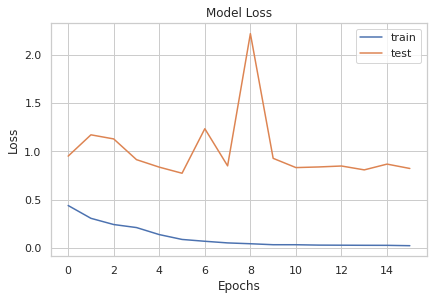

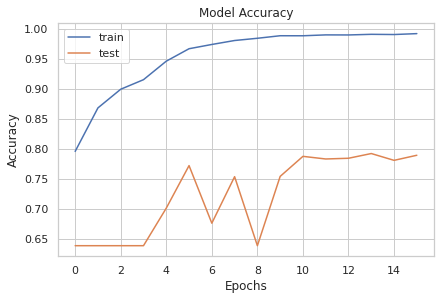

In [ ]:
model = EfficientNetB4(include_top=False, weights='imagenet', input_shape=(img_height, img_width,3))

x = GlobalAveragePooling2D()(model.output)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

History = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              verbose = 1,
                              epochs = epochs,
                              class_weight = class_weight,
                              callbacks = [early_stop,check_point,red_lr])

loss, accuracy = model.evaluate_generator(validation_generator, steps = validation_generator.samples // batch_size)
print('model name: EfficientNetB4')
print('Loss: ',loss)
print('Accuracy: ',accuracy)

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Project/Model_Save/EfficientNetB4.h5')

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

                precision    recall  f1-score   support

Nail Dystrophy       0.76      0.92      0.83      4232
 Onychomycosis       0.78      0.51      0.61      2430

      accuracy                           0.77      6662
     macro avg       0.77      0.71      0.72      6662
  weighted avg       0.77      0.77      0.75      6662



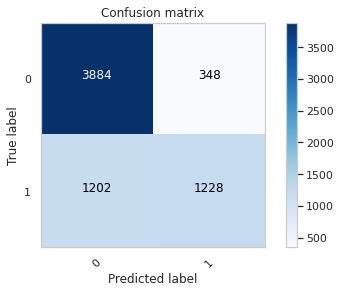

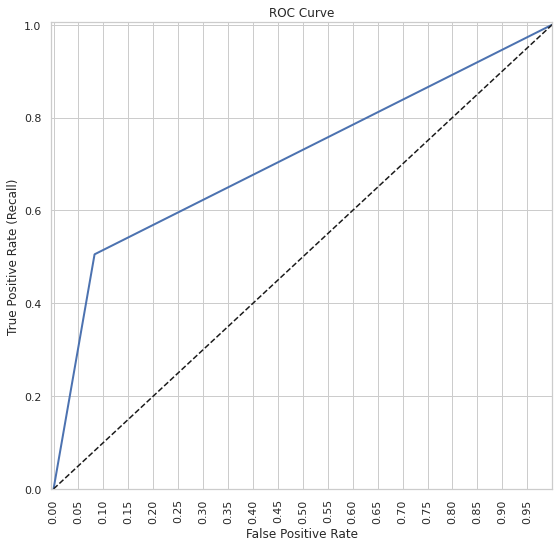

In [ ]:
#validation_generator.reset()

# Predict the values from the validation dataset
y_pred = model.predict_generator(validation_generator)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = validation_generator.labels
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, y_pred_classes, target_names = target_names))

fpr, tpr, auc_thresholds = roc_curve(y_true, y_pred_classes)
plot_roc_curve(fpr, tpr)

Best Threshold=0.026932, F-Score=0.709


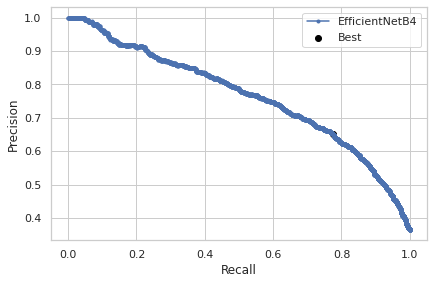

Accuracy Score Before and After Thresholding: 0.7673371359951966, 0.7673371359951966
Precision Score Before and After Thresholding: 0.7791878172588832, 0.6521438450899032
Recall Score Before and After Thresholding: 0.5053497942386831, 0.7761316872427984
F1 Score Before and After Thresholding: 0.6130803794308537, 0.7087561067267943
AUC Before and After Thresholding: 0.7115595852100788, 0.7692095109181856


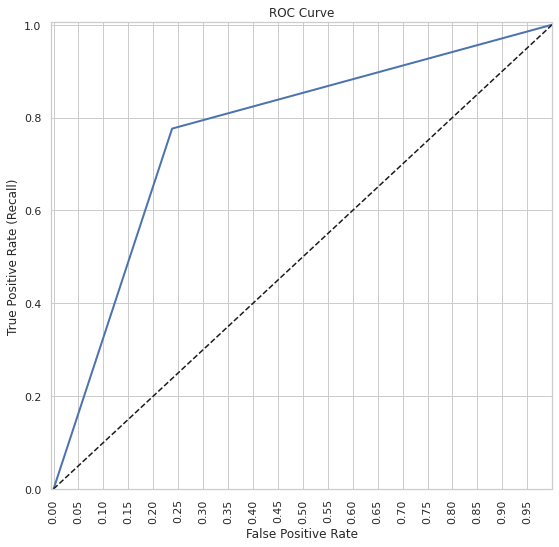

In [ ]:
y_pred_1 = y_pred[:,1]

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_1)
fscore = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plt.plot(recall, precision, marker='.', label='EfficientNetB4')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

optimal_proba_cutoff = thresholds[ix]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred[:, -1]]

print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred_classes), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred_classes), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred_classes), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred_classes), f1_score(y_true, roc_predictions)))
print("AUC Before and After Thresholding: {}, {}".format(roc_auc_score(y_true, y_pred_classes), roc_auc_score(y_true, roc_predictions),))

fpr, tpr, auc_thresholds = roc_curve(y_true, roc_predictions)
plot_roc_curve(fpr, tpr)

                precision    recall  f1-score   support

Nail Dystrophy       0.86      0.76      0.81      4232
 Onychomycosis       0.65      0.78      0.71      2430

      accuracy                           0.77      6662
     macro avg       0.75      0.77      0.76      6662
  weighted avg       0.78      0.77      0.77      6662



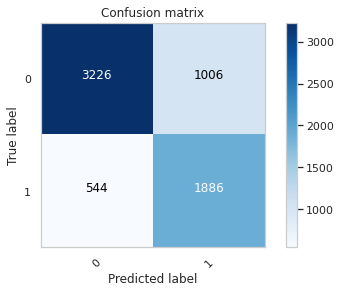

In [ ]:
confusion_mtx = confusion_matrix(y_true, roc_predictions)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print(classification_report(y_true, roc_predictions, target_names = target_names))

#Ensemble

In [ ]:
class EnsembleModel(nn.Module):
    def __init__(self, modelA, modelB, modelC):
        super().__init__()
        self.modelA = modelA
        self.modelB = modelB
        self.modelC = modelC
        self.classifier = nn.Linear(200 * 3, 200)

    def forward(self, x):
        x1 = self.modelA(x)
        x2 = self.modelB(x)
        x3 = self.modelC(x)
        x = torch.cat((x1, x2, x3), dim=1)
        out = self.classifier(x)
        return out

In [ ]:
Model1 = load_model('gfgModel.h5')
Model2 = load_model('gfgModel.h5')
Model3 = load_model('gfgModel.h5')

ensemble_model = EnsembleModel(Model1, Model2, Model3)

#Errors

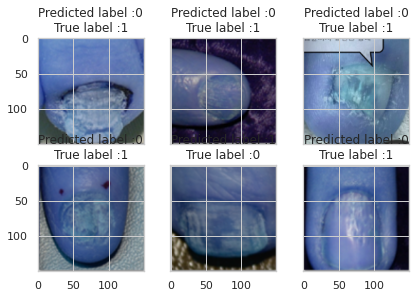

In [ ]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((150,150,3)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, x_test_errors, y_pred_classes_errors, y_true_errors)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
Dermatophyte = test_datagen.flow_from_directory('/content/drive/MyDrive/Project/Project/Onychomycosis_Dermatophyte', target_size=(150,150),
                                            batch_size=35,
                                            class_mode="categorical",shuffle=False)

Found 35 images belonging to 1 classes.


In [ ]:
test_imgs, test_labels = next(Dermatophyte)
test_labels = test_labels - 1

In [ ]:
predictions = model.predict(Dermatophyte)

1/1 [==============================] - 2s 2s/step


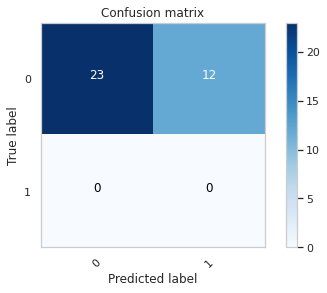

In [ ]:
confusion_mtx = confusion_matrix(test_labels, predictions.argmax(axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
category = {
    0 : ['Onychomycosis'], 1 : ['Nail Dystrophy']
}

path_file = '/content/drive/MyDrive/Project/Project/Onychomycosis_Dermatophyte/Dermatophyte'
path = os.listdir(path_file)
new = [os.path.join(path_file, path[i]) for i in range(len(path))]

img_ = [image.load_img(new[i], target_size=(150,150)) for i in range(len(new))]
img_array = [image.img_to_array(img_[i]) for i in range(len(img_))]
img_process = [np.expand_dims(img_array[i], axis=0) for i in range(len(img_array))]
img_process = [(img_process[i]/255.0) for i in range(len(img_process))]

prediction = [model.predict(img_process[i]) for i in range(len(img_process))]
index = [np.argmax(prediction[i]) for i in range(len(prediction))]


1/1 [==============================] - 0s 20ms/step


In [ ]:
dic = {'predict': index, 'flie_name': path, 'probability' : prediction}
df = pd.DataFrame(dic)
df

,predict,flie_name,probability
0,0,Der_DSCF8293.JPG,"[[0.98024005, 0.019759947]]"
1,1,Der_DSCF0455.JPG,"[[0.1740566, 0.82594335]]"
2,1,Der_DSCF8295.JPG,"[[0.23944367, 0.76055634]]"
3,0,Der_DSCF8292.JPG,"[[0.921697, 0.07830301]]"
4,0,Der_DSCF5612.JPG,"[[0.60637766, 0.3936223]]"
5,0,Der_DSCF8297.JPG,"[[0.93063736, 0.06936267]]"
6,1,Der_DSCF2030.JPG,"[[0.08358393, 0.9164161]]"
7,1,Der_DSCF7340.JPG,"[[0.003579976, 0.99642]]"
8,0,Der_DSCF8291.JPG,"[[0.91355485, 0.086445145]]"
9,0,Der_DSCF5307.JPG,"[[0.91159725, 0.08840278]]"


In [ ]:
predictions.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=target_names))

                precision    recall  f1-score   support

 Onychomycosis       1.00      0.66      0.79        35
Nail Dystrophy       0.00      0.00      0.00         0

      accuracy                           0.66        35
     macro avg       0.50      0.33      0.40        35
  weighted avg       1.00      0.66      0.79        35



In [ ]:
Non_Dermatophyte = test_datagen.flow_from_directory('/content/drive/MyDrive/Project/Project/Onychomycosis_Non-Dermatophyte', target_size=(150,150),
                                            batch_size=158,
                                            class_mode="categorical",shuffle=False)

Found 35 images belonging to 1 classes.


In [ ]:
test_imgs, test_labels = next(Non_Dermatophyte)
test_labels = test_labels - 1

In [ ]:
predictions = model.predict(Non_Dermatophyte)

1/1 [==============================] - 1s 985ms/step


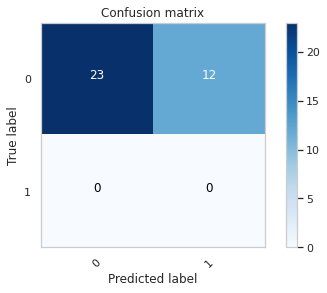

In [ ]:
confusion_mtx = confusion_matrix(test_labels , predictions.argmax(axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
path_file = '/content/drive/MyDrive/Project/Project/Onychomycosis_Non-Dermatophyte/Non-Dermatophyte/'
path = os.listdir(path_file)
#print(path)
new = [os.path.join(path_file, path[i]) for i in range(len(path))]
#print(new)

img_ = [image.load_img(new[i], target_size=(150,150)) for i in range(len(new))]
img_array = [image.img_to_array(img_[i]) for i in range(len(img_))]
img_process = [np.expand_dims(img_array[i], axis=0) for i in range(len(img_array))]
img_process = [(img_process[i]/255.0) for i in range(len(img_process))]

prediction = [model.predict(img_process[i]) for i in range(len(img_process))]
index = [np.argmax(prediction[i]) for i in range(len(prediction))]


1/1 [==============================] - 0s 20ms/step


In [ ]:
dic = {'predict': index, 'flie_name': path, 'probability' : prediction}
df = pd.DataFrame(dic)
df

,predict,flie_name,probability
0,0,NoNDer_DSCF7631.JPG,"[[0.7596271, 0.24037287]]"
1,1,NoNDer_DSCF7883.JPG,"[[0.028198896, 0.97180116]]"
2,0,NoNDer_DSCF7874.JPG,"[[0.5740877, 0.42591232]]"
3,1,NoNDer_DSCF9181_.JPG,"[[0.026757592, 0.9732424]]"
4,1,NoNDer_DSCF9183.JPG,"[[0.32854334, 0.67145663]]"
5,0,NoNDer_DSCF7913.JPG,"[[0.9955096, 0.0044903667]]"
6,0,NoNDer_DSCF7627.JPG,"[[0.96272254, 0.037277438]]"
7,0,NoNDer_DSCF7922.JPG,"[[0.99995315, 4.6904774e-05]]"
8,0,NoNDer_DSCF7876.JPG,"[[0.8830082, 0.11699179]]"
9,0,NoNDer_DSCF9182.JPG,"[[0.96118635, 0.038813643]]"


In [ ]:
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=target_names))

                precision    recall  f1-score   support

 Onychomycosis       1.00      0.66      0.79        35
Nail Dystrophy       0.00      0.00      0.00         0

      accuracy                           0.66        35
     macro avg       0.50      0.33      0.40        35
  weighted avg       1.00      0.66      0.79        35

